<div class="alert alert-info">
    <h2 align="center">سوال پنج قسمت دو </h2>
    <h3 align="center">امیرحسین محمدی</h3>
    <h3 align="center">99101081</h3>
</div>

<h3 align="center">فرخوانی کتابخانه مورد استفاده</h3>

In [1]:
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<h3 align="center">خواندن داده های آموزش </h3>

In [2]:
df = pd.read_csv("Train.csv")

print(df) 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              1      164             82             43       67  32.8   
1              4       90              0              0        0  28.0   
2              1      138             82              0        0  40.1   
3              4      110             92              0        0  37.6   
4              2       93             64             32      160  38.0   
..           ...      ...            ...            ...      ...   ...   
609            1      193             50             16      375  25.9   
610            1      100             66             15       56  23.6   
611            5      143             78              0        0  45.0   
612            4      184             78             39      277  37.0   
613            2       87              0             23        0  28.9   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.341   50    False  
1                  

<h3 align="center">از این تابع جهت تبدیل داده های آموزش به فرمت و فرضیات گفته شده در مسئله استفاده می شود</h3>

In [3]:
def Pre_Process_Data(file):
    Dataset_Diabetes = pd.read_csv(file)
    header=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
    savedata=[]
    for j in range(len(header)):
        listGlucose=[]
        listGlucose=Dataset_Diabetes[header[j]]
        savedata.append(listGlucose)
    dataframe = pd.DataFrame() 
    listtemp=[]
    listtemp=Dataset_Diabetes['Outcome']
    listoutcome=[]
    for i in range(len(listtemp)):
        if(str(listtemp[i])=='True'):
            listoutcome.append('1')
        else:
            listoutcome.append('-1')
    for i in range(0,9):
        if i==8:
            dataframe['Outcome'] = listoutcome
            dataframe.to_excel('preprocess_'+str(file)+'.xlsx', index = False) 
            break
            
        dataframe[header[i]]=savedata[i]


<h3 align="center">فرخوانی تابع تعریف شده برای پیش پردازش داده های آموزش مبتنی بر فرضیات مسئله</h3>

In [4]:
Pre_Process_Data('Train.csv')

<h3 align="center">خواندن داده های آموزش پیش پردازش شده از فایل اکسل ایجاد شده توسط تابع پیش پردازش</h3>

In [5]:
Preprocess_Train_Diabetes = pd.read_excel("preprocess_Train.csv.xlsx")
Preprocess_Train_Diabetes 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,164,82,43,67,32.8,0.341,50,-1
1,4,90,0,0,0,28.0,0.610,31,-1
2,1,138,82,0,0,40.1,0.236,28,-1
3,4,110,92,0,0,37.6,0.191,30,-1
4,2,93,64,32,160,38.0,0.674,23,1
...,...,...,...,...,...,...,...,...,...
609,1,193,50,16,375,25.9,0.655,24,-1
610,1,100,66,15,56,23.6,0.666,26,-1
611,5,143,78,0,0,45.0,0.190,47,-1
612,4,184,78,39,277,37.0,0.264,31,1


<h3 align="center">فرخوانی تابع تعریف شده برای پیش پردازش داده های تست مبتنی بر فرضیات مسئله</h3>

In [6]:
Pre_Process_Data('Test.csv')

<h3 align="center">خواندن داده های تست پیش پردازش شده از فایل اکسل ایجاد شده توسط تابع پیش پردازش</h3>

In [7]:
Preprocess_Test_Diabetes = pd.read_excel("preprocess_Test.csv.xlsx")
Preprocess_Test_Diabetes 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,160,54,32,175,30.5,0.588,39,1
1,5,115,98,0,0,52.9,0.209,28,1
2,5,189,64,33,325,31.2,0.583,29,1
3,1,173,74,0,0,36.8,0.088,38,1
4,6,124,72,0,0,27.6,0.368,29,1
...,...,...,...,...,...,...,...,...,...
149,0,165,76,43,255,47.9,0.259,26,-1
150,2,88,74,19,53,29.0,0.229,22,-1
151,0,135,94,46,145,40.6,0.284,26,-1
152,1,89,66,23,94,28.1,0.167,21,-1


<h3 align="center">تعریف تابع برای حذف  برخی از داده بر اساس فرضیات گفته شده در سوال</h3>

In [8]:
def removedata(df):
    df = df[df['BloodPressure']!= 0]
    df = df[df['BMI']!= 0]
    df = df[df['Glucose']!= 0]
    return df

<h3 align="center">استفاده از تابع تعریف شده برای حذف برخی از داده ها آموزش و ایندکس گذاری مجدد داده ها</h3>

In [9]:
Preprocess_Train_Diabetes = removedata(Preprocess_Train_Diabetes)
Preprocess_Train_Diabetes=Preprocess_Train_Diabetes.reset_index(drop=True) 
Preprocess_Train_Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,164,82,43,67,32.8,0.341,50,-1
1,1,138,82,0,0,40.1,0.236,28,-1
2,4,110,92,0,0,37.6,0.191,30,-1
3,2,93,64,32,160,38.0,0.674,23,1
4,1,101,50,15,36,24.2,0.526,26,-1
...,...,...,...,...,...,...,...,...,...
574,0,177,60,29,478,34.6,1.072,21,1
575,1,193,50,16,375,25.9,0.655,24,-1
576,1,100,66,15,56,23.6,0.666,26,-1
577,5,143,78,0,0,45.0,0.190,47,-1


<h3 align="center">استفاده از تابع تعریف شده برای حذف برخی از داده ها تست و ایندکس گذاری مجدد داده ها</h3>

In [10]:
Preprocess_Test_Diabetes = removedata(Preprocess_Test_Diabetes)
Preprocess_Test_Diabetes=Preprocess_Test_Diabetes.reset_index(drop=True)
Preprocess_Test_Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,160,54,32,175,30.5,0.588,39,1
1,5,115,98,0,0,52.9,0.209,28,1
2,5,189,64,33,325,31.2,0.583,29,1
3,1,173,74,0,0,36.8,0.088,38,1
4,6,124,72,0,0,27.6,0.368,29,1
...,...,...,...,...,...,...,...,...,...
140,0,165,76,43,255,47.9,0.259,26,-1
141,2,88,74,19,53,29.0,0.229,22,-1
142,0,135,94,46,145,40.6,0.284,26,-1
143,1,89,66,23,94,28.1,0.167,21,-1


<h3 align="center">ایجاد یک مجموعه اعتبار سنجی به صورت 15 درصد از داده های آموزش</h3>

In [11]:
Validation=Preprocess_Train_Diabetes[492:]#%15
Validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
492,2,105,80,45,191,33.7,0.711,29,1
493,2,101,58,17,265,24.2,0.614,23,-1
494,5,88,66,21,23,24.4,0.342,30,-1
495,2,83,65,28,66,36.8,0.629,24,-1
496,6,98,58,33,190,34.0,0.430,43,-1
...,...,...,...,...,...,...,...,...,...
574,0,177,60,29,478,34.6,1.072,21,1
575,1,193,50,16,375,25.9,0.655,24,-1
576,1,100,66,15,56,23.6,0.666,26,-1
577,5,143,78,0,0,45.0,0.190,47,-1


<h3 align="center">ایندکس گذاری مجدد داده های اعتبار سنجی</h3>

In [12]:
Validation=Validation.reset_index(drop=True)
Validation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,105,80,45,191,33.7,0.711,29,1
1,2,101,58,17,265,24.2,0.614,23,-1
2,5,88,66,21,23,24.4,0.342,30,-1
3,2,83,65,28,66,36.8,0.629,24,-1
4,6,98,58,33,190,34.0,0.430,43,-1
...,...,...,...,...,...,...,...,...,...
82,0,177,60,29,478,34.6,1.072,21,1
83,1,193,50,16,375,25.9,0.655,24,-1
84,1,100,66,15,56,23.6,0.666,26,-1
85,5,143,78,0,0,45.0,0.190,47,-1


<h3 align="center">جدا کردن داده های اعتبار سنجی از داده های آموزش</h3>

In [13]:
Preprocess_Train_Diabetes=Preprocess_Train_Diabetes[0:492]#%85
Preprocess_Train_Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,164,82,43,67,32.8,0.341,50,-1
1,1,138,82,0,0,40.1,0.236,28,-1
2,4,110,92,0,0,37.6,0.191,30,-1
3,2,93,64,32,160,38.0,0.674,23,1
4,1,101,50,15,36,24.2,0.526,26,-1
...,...,...,...,...,...,...,...,...,...
487,6,93,50,30,64,28.7,0.356,23,-1
488,5,109,75,26,0,36.0,0.546,60,-1
489,1,115,70,30,96,34.6,0.529,32,1
490,3,163,70,18,105,31.6,0.268,28,1


<h3 align="center">جدا کردن  ویژگی ها از لیبل ها</h3>

In [14]:
X_train,Y_train = Preprocess_Train_Diabetes.drop('Outcome',axis=1),Preprocess_Train_Diabetes['Outcome']
X_test,Y_test=Preprocess_Test_Diabetes.drop('Outcome',axis=1),Preprocess_Test_Diabetes['Outcome']
X_val,Y_val=Validation.drop('Outcome',axis=1),Validation['Outcome']

In [15]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,164,82,43,67,32.8,0.341,50
1,1,138,82,0,0,40.1,0.236,28
2,4,110,92,0,0,37.6,0.191,30
3,2,93,64,32,160,38.0,0.674,23
4,1,101,50,15,36,24.2,0.526,26
...,...,...,...,...,...,...,...,...
487,6,93,50,30,64,28.7,0.356,23
488,5,109,75,26,0,36.0,0.546,60
489,1,115,70,30,96,34.6,0.529,32
490,3,163,70,18,105,31.6,0.268,28


In [16]:
Y_train

0     -1
1     -1
2     -1
3      1
4     -1
      ..
487   -1
488   -1
489    1
490    1
491   -1
Name: Outcome, Length: 492, dtype: int64

In [17]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,160,54,32,175,30.5,0.588,39
1,5,115,98,0,0,52.9,0.209,28
2,5,189,64,33,325,31.2,0.583,29
3,1,173,74,0,0,36.8,0.088,38
4,6,124,72,0,0,27.6,0.368,29
...,...,...,...,...,...,...,...,...
140,0,165,76,43,255,47.9,0.259,26
141,2,88,74,19,53,29.0,0.229,22
142,0,135,94,46,145,40.6,0.284,26
143,1,89,66,23,94,28.1,0.167,21


In [18]:
Y_test

0      1
1      1
2      1
3      1
4      1
      ..
140   -1
141   -1
142   -1
143   -1
144   -1
Name: Outcome, Length: 145, dtype: int64

In [19]:
X_val

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,105,80,45,191,33.7,0.711,29
1,2,101,58,17,265,24.2,0.614,23
2,5,88,66,21,23,24.4,0.342,30
3,2,83,65,28,66,36.8,0.629,24
4,6,98,58,33,190,34.0,0.430,43
...,...,...,...,...,...,...,...,...
82,0,177,60,29,478,34.6,1.072,21
83,1,193,50,16,375,25.9,0.655,24
84,1,100,66,15,56,23.6,0.666,26
85,5,143,78,0,0,45.0,0.190,47


In [20]:
Y_val

0     1
1    -1
2    -1
3    -1
4    -1
     ..
82    1
83   -1
84   -1
85   -1
86    1
Name: Outcome, Length: 87, dtype: int64

<h3 align="center">نرمال سازی داده های آموزش</h3>

In [21]:
X_train=(X_train-X_train.min())/(X_train.max()-X_train.min())

In [22]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.784314,0.591837,0.434343,0.079196,0.298569,0.127732,0.483333
1,0.058824,0.614379,0.591837,0.000000,0.000000,0.447853,0.076736,0.116667
2,0.235294,0.431373,0.693878,0.000000,0.000000,0.396728,0.054881,0.150000
3,0.117647,0.320261,0.408163,0.323232,0.189125,0.404908,0.289461,0.033333
4,0.058824,0.372549,0.265306,0.151515,0.042553,0.122699,0.217581,0.083333
...,...,...,...,...,...,...,...,...
487,0.352941,0.320261,0.265306,0.303030,0.075650,0.214724,0.135017,0.033333
488,0.294118,0.424837,0.520408,0.262626,0.000000,0.364008,0.227295,0.650000
489,0.058824,0.464052,0.469388,0.303030,0.113475,0.335378,0.219038,0.183333
490,0.176471,0.777778,0.469388,0.181818,0.124113,0.274029,0.092278,0.116667


In [23]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,0.226088,0.506762,0.494027,0.216987,0.096617,0.283846,0.184432,0.206741
std,0.200896,0.198221,0.122858,0.158388,0.138021,0.138735,0.146315,0.205990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359477,0.408163,0.000000,0.000000,0.185583,0.080986,0.033333
50%,0.176471,0.477124,0.489796,0.242424,0.051418,0.282209,0.139631,0.133333
75%,0.352941,0.627451,0.571429,0.333333,0.153664,0.361963,0.252793,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 align="center">نرمال سازی داده های تست</h3>

In [24]:
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

In [25]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.500000,0.735714,0.300,0.507937,0.235215,0.251295,0.214408,0.409091
1,0.357143,0.414286,0.850,0.000000,0.000000,0.831606,0.051887,0.159091
2,0.357143,0.942857,0.425,0.523810,0.436828,0.269430,0.212264,0.181818
3,0.071429,0.828571,0.550,0.000000,0.000000,0.414508,0.000000,0.386364
4,0.428571,0.478571,0.525,0.000000,0.000000,0.176166,0.120069,0.181818
...,...,...,...,...,...,...,...,...
140,0.000000,0.771429,0.575,0.682540,0.342742,0.702073,0.073328,0.113636
141,0.142857,0.221429,0.550,0.301587,0.071237,0.212435,0.060463,0.022727
142,0.000000,0.557143,0.800,0.730159,0.194892,0.512953,0.084048,0.113636
143,0.071429,0.228571,0.450,0.365079,0.126344,0.189119,0.033877,0.000000


In [26]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.292611,0.471576,0.530948,0.319978,0.120773,0.318349,0.176374,0.297492
std,0.230431,0.227159,0.160910,0.255505,0.168956,0.189612,0.168564,0.244104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071429,0.307143,0.425000,0.000000,0.000000,0.176166,0.063036,0.090909
50%,0.285714,0.450000,0.525000,0.349206,0.064516,0.303109,0.134648,0.227273
75%,0.428571,0.621429,0.600000,0.507937,0.188172,0.414508,0.245283,0.477273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3 align="center">نرمال سازی داده های اعتبارسنجی</h3>

In [27]:
X_val=(X_val-X_val.min())/(X_val.max()-X_val.min())
X_val

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.153846,0.248,0.595238,0.750000,0.399582,0.520147,0.282856,0.181818
1,0.153846,0.216,0.333333,0.283333,0.554393,0.172161,0.238745,0.045455
2,0.384615,0.112,0.428571,0.350000,0.048117,0.179487,0.115052,0.204545
3,0.153846,0.072,0.416667,0.466667,0.138075,0.633700,0.245566,0.068182
4,0.461538,0.192,0.333333,0.550000,0.397490,0.531136,0.155070,0.500000
...,...,...,...,...,...,...,...,...
82,0.000000,0.824,0.357143,0.483333,1.000000,0.553114,0.447021,0.000000
83,0.076923,0.952,0.238095,0.266667,0.784519,0.234432,0.257390,0.068182
84,0.076923,0.208,0.428571,0.250000,0.117155,0.150183,0.262392,0.113636
85,0.384615,0.552,0.571429,0.000000,0.000000,0.934066,0.045930,0.590909


In [28]:
X_val.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.277630,0.383632,0.502326,0.389464,0.190689,0.517241,0.200598,0.245820
std,0.253870,0.253200,0.161176,0.256430,0.216186,0.242026,0.173603,0.221668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.208000,0.404762,0.225000,0.000000,0.358974,0.078445,0.068182
50%,0.230769,0.328000,0.500000,0.450000,0.138075,0.520147,0.144611,0.204545
75%,0.423077,0.512000,0.595238,0.575000,0.292887,0.683150,0.274443,0.386364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
X_train = X_train.values
X_test=X_test.values
X_val=X_val.values

<h3 align="center">تعریف کلاس پرسپترون ساده مطابق با فرضیات مسئله</h3>

In [30]:
class Simle_Perceptron:
  
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else -1
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y,X_val,Y_val, epochs = 1):
    
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        val_accuracy={}
        max_accuracy = 0
        max_accuracy_val=0

        wt_matrix = []

        for i in range(epochs):
            for x, y in zip(X, Y):
                
                y_pred = self.model(x)
                if y == 1 and y_pred == -1:
                    self.w = self.w + x
                    self.b = self.b - 1
                elif y == -1 and y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b + 1

            wt_matrix.append(self.w)    
            accuracy[i] =Calculate_Acc(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b
            val_accuracy[i] = Calculate_Acc(self.predict(X_val), Y_val)
            if val_accuracy[i]>max_accuracy_val:
                max_accuracy_val=val_accuracy[i]
            print('Epoch '+str(i+1)+'=> Train Accuracy='+str(accuracy[i]))
            print('Epoch '+str(i+1)+'=> Validation Accuracy='+str(val_accuracy[i]))
            

        self.w = chkptw
        self.b = chkptb

        print('Best Train Accuracy is: '+str(max_accuracy))
        print('Best Validation Accuracy is:'+str(np.max(max_accuracy_val)))
        #print(accuracy.values())
        plt.plot(list(val_accuracy.values()))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(chkptw),np.array(chkptb)

<h3 align="center">تعریف تابع جهت محسابه ی دقت</h3>

In [31]:
def Calculate_Acc(y_pred,y_true):
    accuracy=np.mean(y_pred == y_true)
    return accuracy
    

<h3 align="center">تعریف تابع جهت پیش بینی بر روی داده های تست</h3>

In [32]:
def predict_test(w,b,x):
    return 1 if (np.dot(w, x) >= b) else -1

<h3 align="center">ایجاد کلاس پرسپترون</h3>

In [33]:
perceptron = Simle_Perceptron()

<h3 align="center">استفاده از کلاس پرسپترون برای محاسبه ی بهترین وزن و بایاس و نمایش نمودار تغییرات دقت بر روی داده های اعتبار سنجی</h3>

Epoch 1=> Train Accuracy=0.7682926829268293
Epoch 1=> Validation Accuracy=0.735632183908046
Epoch 2=> Train Accuracy=0.7073170731707317
Epoch 2=> Validation Accuracy=0.6781609195402298
Epoch 3=> Train Accuracy=0.7886178861788617
Epoch 3=> Validation Accuracy=0.7931034482758621
Epoch 4=> Train Accuracy=0.7845528455284553
Epoch 4=> Validation Accuracy=0.7471264367816092
Epoch 5=> Train Accuracy=0.7845528455284553
Epoch 5=> Validation Accuracy=0.7816091954022989
Epoch 6=> Train Accuracy=0.7926829268292683
Epoch 6=> Validation Accuracy=0.7586206896551724
Epoch 7=> Train Accuracy=0.7845528455284553
Epoch 7=> Validation Accuracy=0.735632183908046
Epoch 8=> Train Accuracy=0.733739837398374
Epoch 8=> Validation Accuracy=0.6781609195402298
Epoch 9=> Train Accuracy=0.7764227642276422
Epoch 9=> Validation Accuracy=0.7126436781609196
Epoch 10=> Train Accuracy=0.7804878048780488
Epoch 10=> Validation Accuracy=0.7586206896551724
Epoch 11=> Train Accuracy=0.733739837398374
Epoch 11=> Validation Accur

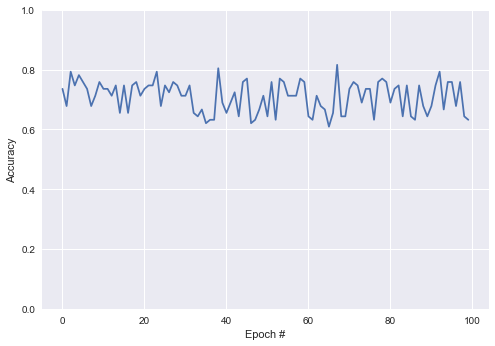

In [34]:
Best_w,Best_b = perceptron.fit(X_train, Y_train,X_val,Y_val, 100)

<h3 align="center">نمایش یهترین وزن بدست آمده بر اساس مفروضات مسئله و مقدارهی پارامترها</h3>

In [35]:
Best_w

array([ 0.88235294,  2.92156863, -0.78571429, -1.12121212,  0.39243499,
        2.8200409 ,  2.41282176,  0.73333333])

<h3 align="center">نمایش بهترین بایاس بدست آمده بر اساس مفروضات مسئله و مقدارهی پارامترها</h3>

In [36]:
Best_b

array(3)

<h3 align="center">پیش بینی بر روی داده های تست</h3>

In [37]:
y_pred=[]
for i in range(len(X_test)):
    temp=predict_test(Best_w,Best_b,X_test[i])
    y_pred.append(temp)

<h3 align="center">محاسبه ی دقت بر روی داده های تست</h3>

In [38]:
Calculate_Acc(y_pred,Y_test)

0.7586206896551724

<h3 align="center">نمایش کانفیوژن ماتریس </h3>

In [39]:
data = {'y_Actual':Y_test,
        'y_Predicted':y_pred}

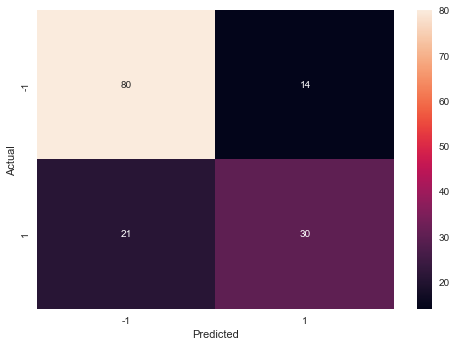

In [40]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

<h3 align="center">Sensitivity</h3>

In [41]:
Sen=(30)/(30+21)
Sen

0.5882352941176471

<h3 align="center">f-score</h3>

In [42]:
fs=(2*30)/(2*30+21+14)
fs

0.631578947368421

<h3 align="center">Specificity</h3>

In [43]:
Sp=(80)/(80+14)
Sp

0.851063829787234

<h3 align="center">تعریف کلاس پرسپترون به صورت فول بچ</h3>

In [44]:
class Full_Batch_Perceptron:
  
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else -1
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y,X_val,Y_val, epochs = 1,learning_rate=1):
    
        self.w = np.ones(X.shape[1])
        self.b = 0

        accuracy = {}
        val_accuracy={}
        max_accuracy = 0
        max_accuracy_val=0

        wt_matrix = []

        for i in range(epochs):
            y_pred=[]
            k=0
            for x, y in zip(X, Y):
                
                y_pred.append(self.model(x))
            for x, y in zip(X, Y):
                if y == 1 and y_pred[k] == -1:
                    self.w = self.w +learning_rate* x
                    self.b = self.b -learning_rate* 1
                elif y == -1 and y_pred[k] == 1:
                    self.w = self.w -learning_rate* x
                    self.b = self.b +learning_rate* 1
                    
                k=k+1

            wt_matrix.append(self.w)    
            #accuracy[i] = accuracy_score(self.predict(X), Y)
            accuracy[i] =Calculate_Acc(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b
            val_accuracy[i] = Calculate_Acc(self.predict(X_val), Y_val)
            if val_accuracy[i]>max_accuracy_val:
                max_accuracy_val=val_accuracy[i]
            print('Epoch '+str(i+1)+'=> Train Accuracy='+str(accuracy[i]))
            print('Epoch '+str(i+1)+'=> Validation Accuracy='+str(val_accuracy[i]))
            

        self.w = chkptw
        self.b = chkptb

        print('Best Train Accuracy is: '+str(max_accuracy))
        print('Best Validation Accuracy is:'+str(np.max(max_accuracy_val)))
        #print(accuracy.values())
        plt.plot(list(val_accuracy.values()))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(chkptw),np.array(chkptb)

<h3 align="center">ایجاد کلاس پرسپترون </h3>

In [45]:
perceptron = Full_Batch_Perceptron()

<h3 align="center">استفاده از کلاس پرسپترون فول بچ برای محاسبه ی بهترین وزن و بایاس و نمایش نمودار تغییرات دقت بر روی داده های اعتبار سنجی</h3>

Epoch 1=> Train Accuracy=0.6605691056910569
Epoch 1=> Validation Accuracy=0.6436781609195402
Epoch 2=> Train Accuracy=0.7134146341463414
Epoch 2=> Validation Accuracy=0.5977011494252874
Epoch 3=> Train Accuracy=0.676829268292683
Epoch 3=> Validation Accuracy=0.7241379310344828
Epoch 4=> Train Accuracy=0.3394308943089431
Epoch 4=> Validation Accuracy=0.3563218390804598
Epoch 5=> Train Accuracy=0.6605691056910569
Epoch 5=> Validation Accuracy=0.6436781609195402
Epoch 6=> Train Accuracy=0.7378048780487805
Epoch 6=> Validation Accuracy=0.6781609195402298
Epoch 7=> Train Accuracy=0.7378048780487805
Epoch 7=> Validation Accuracy=0.6091954022988506
Epoch 8=> Train Accuracy=0.6808943089430894
Epoch 8=> Validation Accuracy=0.735632183908046
Epoch 9=> Train Accuracy=0.3394308943089431
Epoch 9=> Validation Accuracy=0.3563218390804598
Epoch 10=> Train Accuracy=0.6605691056910569
Epoch 10=> Validation Accuracy=0.6436781609195402
Epoch 11=> Train Accuracy=0.7357723577235772
Epoch 11=> Validation Acc

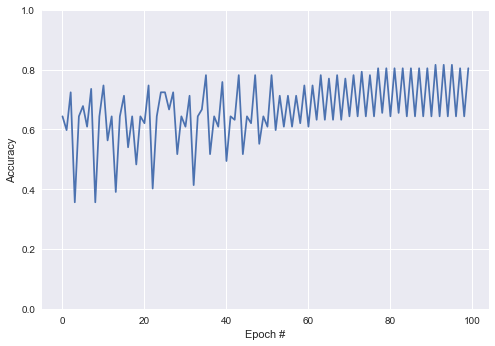

In [46]:
Best_w,Best_b = perceptron.fit(X_train, Y_train,X_val,Y_val, 100,0.01)

<h3 align="center">نمایش یهترین وزن بدست آمده بر اساس مفروضات مسئله و مقدارهی پارامترها</h3>

In [47]:
Best_w

array([ 1.29235294,  2.48503268, -0.09510204,  0.62262626,  0.96601655,
        1.34122699,  1.38455561,  1.48716667])

<h3 align="center">نمایش یهترین بایاس بدست آمده بر اساس مفروضات مسئله و مقدارهی پارامترها</h3>

In [48]:
Best_b

array(3.01)

<h3 align="center">پیش بینی بر روی داده های تست</h3>

In [49]:
y_pred=[]
for i in range(len(X_test)):
    temp=predict_test(Best_w,Best_b,X_test[i])
    y_pred.append(temp)

<h3 align="center">محاسبه دقت بر روی داده های تست</h3>

In [50]:
Calculate_Acc(y_pred,Y_test)

0.7103448275862069

<h3 align="center">محاسبه ی کانفیوژن</h3>

In [51]:
data = {'y_Actual':Y_test,
        'y_Predicted':y_pred}

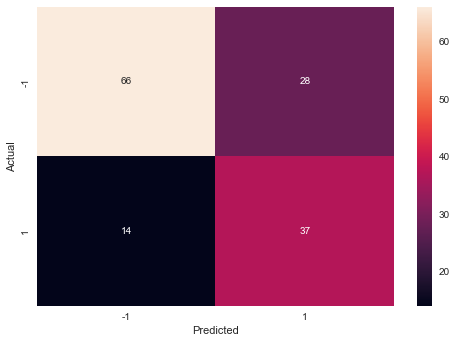

In [52]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

<h3 align="center">Sensitivity</h3>

In [53]:
Sen=(37)/(37+14)
Sen

0.7254901960784313

<h3 align="center">f-score</h3>

In [54]:
fs=(2*37)/(2*37+14+28)
fs

0.6379310344827587

<h3 align="center">Specificity</h3>

In [55]:
Sp=(66)/(66+28)
Sp

0.7021276595744681

<h3 align="center">تعریف کلاس پرسپترون به صورت مینی بچ</h3>

In [56]:
class Mini_Batch_Perceptron:
  
    def __init__ (self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else -1
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, mini_batch_X, mini_batch_Y,X_val,Y_val, epochs = 1,learning_rate=0.01):
    
        self.w = np.ones(np.array(mini_batch_X[0]).shape[1])
        self.b = 0

        accuracy = {}
        val_accuracy={}
        max_accuracy = 0
        max_accuracy_val=0

        wt_matrix = []

        for i in range(epochs):
            y_pred=[]
            k=0
            for f in range(len(mini_batch_X)):
                X=np.array(mini_batch_X[f])
                Y=np.array(mini_batch_Y[f])
                for x, y in zip(X, Y):

                    y_pred.append(self.model(x))
                for x, y in zip(X, Y):
                    if y == 1 and y_pred[k] == -1:
                        self.w = self.w +learning_rate*x
                        self.b = self.b -learning_rate*1
                    elif y == -1 and y_pred[k] == 1:
                        self.w = self.w -learning_rate*x
                        self.b = self.b +learning_rate*1

                    k=k+1

            wt_matrix.append(self.w)    
            #accuracy[i] = accuracy_score(self.predict(X), Y)
            accuracy[i] =Calculate_Acc(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                j = i
                chkptw = self.w
                chkptb = self.b
            val_accuracy[i] = Calculate_Acc(self.predict(X_val), Y_val)
            if val_accuracy[i]>max_accuracy_val:
                max_accuracy_val=val_accuracy[i]
            print('Epoch '+str(i+1)+'=> Train Accuracy='+str(accuracy[i]))
            print('Epoch '+str(i+1)+'=> Validation Accuracy='+str(val_accuracy[i]))
            

        self.w = chkptw
        self.b = chkptb

        print('Best Train Accuracy is: '+str(max_accuracy))
        print('Best Validation Accuracy is:'+str(np.max(max_accuracy_val)))
        #print(accuracy.values())
        plt.plot(list(val_accuracy.values()))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(chkptw),np.array(chkptb)

<h3 align="center">تعریف یک تابع برای ایجاد بچ از داد های آموزشی</h3>

In [57]:
def Create_Batch(X_train,Y_train,Batch_Size):
    mini_batch=np.trunc(len(X_train)/Batch_Size)
    list_mini_batch_X_train=[]
    list_mini_batch_Y_train=[]
    f=0
    l=Batch_Size
    for i in range(int(mini_batch)):
        temp_X=[]
        temp_Y=[]
        for j in range(f,l):
            temp_X.append(X_train[j])
            temp_Y.append(Y_train[j])
        list_mini_batch_X_train.append(temp_X)
        list_mini_batch_Y_train.append(temp_Y)


        f=f+Batch_Size
        l=Batch_Size*(i+2)

    temp_X=[]
    temp_Y=[]    
    for i in range(f,len(X_train)): 
        temp_X.append(X_train[i])
        temp_Y.append(Y_train[i])

    list_mini_batch_X_train.append(temp_X)
    list_mini_batch_Y_train.append(temp_Y)   
    return list_mini_batch_X_train,list_mini_batch_Y_train

<h3 align="center">فرخوانی تابع تولید بچ برای ایجاد بچ از داده های آموزشی</h3>

In [58]:
list_mini_batch_X_train,list_mini_batch_Y_train=Create_Batch(X_train,Y_train,50)

<h3 align="center">ایجاد کلاس پرسپترون مینی بچ</h3>

In [59]:
perceptron = Mini_Batch_Perceptron()

Epoch 1=> Train Accuracy=0.7142857142857143
Epoch 1=> Validation Accuracy=0.5402298850574713
Epoch 2=> Train Accuracy=0.7380952380952381
Epoch 2=> Validation Accuracy=0.5977011494252874
Epoch 3=> Train Accuracy=0.7619047619047619
Epoch 3=> Validation Accuracy=0.5977011494252874
Epoch 4=> Train Accuracy=0.7619047619047619
Epoch 4=> Validation Accuracy=0.5977011494252874
Epoch 5=> Train Accuracy=0.7380952380952381
Epoch 5=> Validation Accuracy=0.6206896551724138
Epoch 6=> Train Accuracy=0.7380952380952381
Epoch 6=> Validation Accuracy=0.6206896551724138
Epoch 7=> Train Accuracy=0.7380952380952381
Epoch 7=> Validation Accuracy=0.632183908045977
Epoch 8=> Train Accuracy=0.7380952380952381
Epoch 8=> Validation Accuracy=0.632183908045977
Epoch 9=> Train Accuracy=0.7380952380952381
Epoch 9=> Validation Accuracy=0.6551724137931034
Epoch 10=> Train Accuracy=0.7380952380952381
Epoch 10=> Validation Accuracy=0.6551724137931034
Epoch 11=> Train Accuracy=0.7619047619047619
Epoch 11=> Validation Acc

Epoch 92=> Validation Accuracy=0.7701149425287356
Epoch 93=> Train Accuracy=0.7857142857142857
Epoch 93=> Validation Accuracy=0.7816091954022989
Epoch 94=> Train Accuracy=0.6666666666666666
Epoch 94=> Validation Accuracy=0.7126436781609196
Epoch 95=> Train Accuracy=0.6904761904761905
Epoch 95=> Validation Accuracy=0.7701149425287356
Epoch 96=> Train Accuracy=0.7380952380952381
Epoch 96=> Validation Accuracy=0.8160919540229885
Epoch 97=> Train Accuracy=0.7857142857142857
Epoch 97=> Validation Accuracy=0.7816091954022989
Epoch 98=> Train Accuracy=0.6428571428571429
Epoch 98=> Validation Accuracy=0.7011494252873564
Epoch 99=> Train Accuracy=0.7142857142857143
Epoch 99=> Validation Accuracy=0.632183908045977
Epoch 100=> Train Accuracy=0.7857142857142857
Epoch 100=> Validation Accuracy=0.7816091954022989
Best Train Accuracy is: 0.8333333333333334
Best Validation Accuracy is:0.8275862068965517


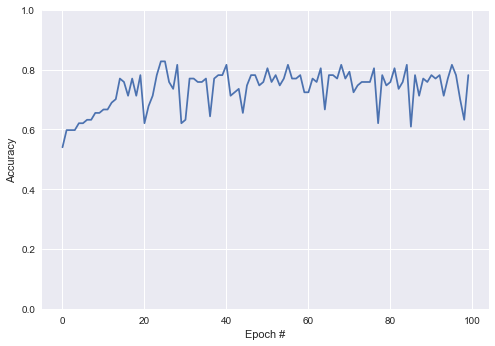

In [60]:
Best_w,Best_b = perceptron.fit(list_mini_batch_X_train, list_mini_batch_Y_train,X_val,Y_val, 100,0.01)

<h3 align="center">نمایش بهترین وزن بدست آمده بر اساس پارامترها و فرضیات مسئله</h3>

In [61]:
Best_w

array([ 0.09588235,  0.35202614,  0.0427551 , -0.0359596 ,  0.05048463,
        0.33619632,  0.30643516,  0.1065    ])

<h3 align="center">نمایش بهترین بایاس بدست آمده بر اساس پارامترها و فرضیات مسئله</h3>

In [62]:
Best_b

array(0.5)

<h3 align="center">پیش بینی بر روی داده های تست</h3>

In [63]:
y_pred=[]
for i in range(len(X_test)):
    temp=predict_test(Best_w,Best_b,X_test[i])
    y_pred.append(temp)

<h3 align="center">محاسبه ی دقت بر روی داده های تست</h3>

In [64]:
Calculate_Acc(y_pred,Y_test)

0.7655172413793103

<h3 align="center">ایجاد کانفیوژن ماتریس</h3>

In [65]:
data = {'y_Actual':Y_test,
        'y_Predicted':y_pred}

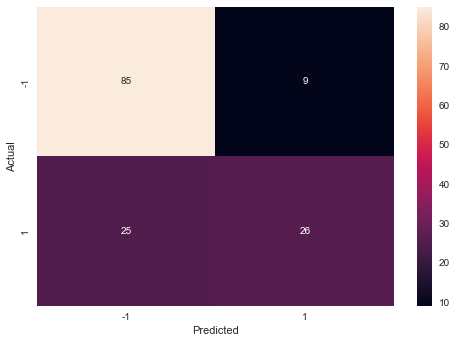

In [66]:
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

<h3 align="center">Sensitivity</h3>

In [67]:
Sen=(26)/(26+25)
Sen

0.5098039215686274

<h3 align="center">f-score</h3>

In [68]:
fs=(2*26)/(2*26+9+25)
fs

0.6046511627906976

<h3 align="center">Specificity</h3>

In [69]:
Sp=(85)/(85+9)
Sp

0.9042553191489362